<a href="https://colab.research.google.com/github/Elcejas77/Ejercicios/blob/main/Ejercicio_de_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#@title Librerías
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import ipywidgets
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
#from numpy import sin, sqrt, cos
#from scipy import signal
#from matplotlib import animation, rc
#from IPython.display import HTML
#import warnings




In [ ]:
#@title Funciones
#@markdown Acá se encuentran las funciones creadas que d
def my_disc(ti,tf,Fs): # Esta función nos da los periodos de muestreo
  tvd = np.arange(ti,tf,1/Fs)
  return tvd

def my_ceropen(x,ymin, ymax): # Esta función convierte una ecuación normal a la forme de cero y pendiente en determinado rango
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(xd_cp,nbits,rmin,rmax): # Esta es la función de digitalizar la ecuación
  ve = np.linspace(rmin,rmax,2**nbits) # vector de estados
  d = cdist(xd_cp.reshape(-1,1),ve.reshape(-1,1)) # distancia entre cada elemento de xd_cp y cada estado en ve
  ind = np.argmin(d,axis=1) # buscar min sobre columnas (distancia x[i] contra todos los estados en ve)
  xq = np.zeros(ind.shape[0]) # inicializar xq con ceros
  for i in range(ind.shape[0]):
    xq[i] = ve[ind[i]] # asignando a xq[i] el valor en ve mas cercano a xd_cp[i]
  return xq

def senial(f):
  n = arange(0, 50)
  plt.figure(1, (25, 10))
  x = cos(2*pi*f*n)
  plt.stem(n, x, use_line_collection=True)
  plt.grid()
  plt.margins(x=.01)
  plt.title('Gráfica de la señal $x[n] = cos(2\pi \cdot {} \cdot n)$'.format(f), fontsize=15)
  plt.xlabel('Muestras')
  plt.show()

def convgraf(h,x):
   lx = len(x)
   lh = len(h)
   M = 2*lx+lh
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lx,1)),h,np.zeros((lx,1))]
   ym = np.zeros((M,M))
   for i in range(M-lx+1):
     #print(i)
     xm[i:i+lx,i] = np.flip(x).reshape(-1)
     ym[i,i] = xm[:,i].T.dot(hm)
   return xm, ym, hm

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(xm[:,k],linefmt='brown',markerfmt=('brown','+'),label='$x[k]$')
     plt.stem(hm,linefmt='gray',markerfmt=('gray','*'),label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt=('darkblue','s'),linefmt='darkblue',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return

# *Conceptos básicos*



> **1.1.** Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función **stem**.

**R/** La ecuación a discretizar es

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$


<ipython-input-16-ebb449eec7db>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, x_tk, use_line_collection=True, linefmt='C6:',  markerfmt='C4o')


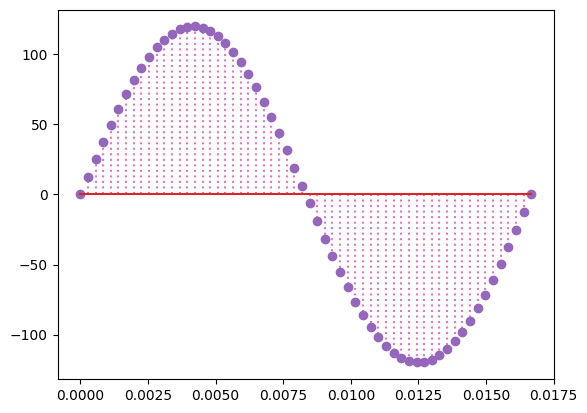

In [16]:
#@title Señal $x[t_k]$ discretizada
# Se crea un vector tiempo por rango y por número de muestras

M = 60 #int(input("ingrese el numero de muestras ")) # número de muestras que puede ser variable
T_o = 1/60 # periodo de la función sen
ti = 0 # tiempo incial referencia en segundos
tf = T_o # tieimpo final en segundos
A = 120 # amplitud
tv = np.linspace(start=ti,stop=tf,num=M) # vector en donde se encuentran las 60 muestras
x_tk = A * np.sin(2*np.pi*tv/T_o) # vector de amplitud

# programación de la función stem

x = np.linspace(ti, tf, M) # periodo de muestreo

plt.stem(x, x_tk, use_line_collection=True, linefmt='C6:',  markerfmt='C4o')
plt.show()



> **1.2.** Consultar el funcionamiento de los métodos cdist y argmin.

**R/**

* Cdist: Esta función recibe dos arreglos y entrega la distancia entre los puntos de ambos arreglos utilizando la métrica que el usuario escoja.

* Argmin: Esta función recibe un arreglo, tiene la opción de que esta empiece a funcionar más adelante en el arreglo (no necesariamente tiene que empezar en la posición 0). Lo que hace es que analiza el arreglo y entrega el número de la posición en el que se encuentra el número de menor valor. Si se repite el valor mínimo más de una vez, entrega la primera posición encontrada.



> **1.3.** Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.

**R/** La ecuación a trabajar es la siguiente:

$$x[t_k] = A \cos[2 \pi F_o *t]$$

In [20]:
def my_ceropen(x,ymin = 0, ymax = 10):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv  #funcion con valores max y min definidos




def discretizar_cuantizar_graficar(A,f,fs,nbits,ymaxima,yminima): #La función recibe la Amplitud (A) la frecuencia(f) la cantidad de bits(nbits) y los valores
                                                               #máximos y mínimos de la amplitud de señal (ymaxima y yminima respectivamente)

 "---------------Definir función---------------"
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.spatial.distance import  cdist

 T_o=1/f           #Definiendo parametros para construir la señal
 ti=0
 tf=3*T_o
 k=500             #cantidad de muestras para la señal continua
 tv=np.linspace(ti,tf,k)
 xv = A * np.cos(2*f*np.pi*tv) #vector de amplitud
 yv=my_ceropen(xv,yminima,ymaxima)  #Definiendo un valor de amplitud máximo y mínimo


 "-----------------DISCRETIZAR-----------------"

 n=np.arange(ti,tf,1/fs)  #Cantidad de Muestras

 xn=A*np.cos(2*np.pi*f*n) #Amplitud de muestras

 yn=my_ceropen(xn,yminima,ymaxima)   #Calculando 0 y pendiente para tener la funcion en los limites


 "-----------------CUANTIZAR-----------------"

 rmin = yminima

 rmax = ymaxima

 ve = np.linspace(rmin,rmax,2**nbits) # Calculando la cantidad de cajones dado el numero de bits

 d = cdist(yn.reshape(-1,1),ve.reshape(-1,1)) #  calculando la distancia entre cada muestra y los intervalos de bits                                       ¨duda¨

 ind = np.argmin(d,axis=1) #calculando la mejor aproximación entre el valor real y el digital                                                              ¨duda¨


 "----------------GRAFICAR--------------------"

 plt.subplot(311)
 plt.plot(tv,xv,".r")

 plt.subplot(312)
 plt.plot(tv,yv,".y")

 plt.subplot(313)
 plt.stem(n,ve[ind])  #graficando las muestras de tiempo discreto contra la menor amplitud para cada caso

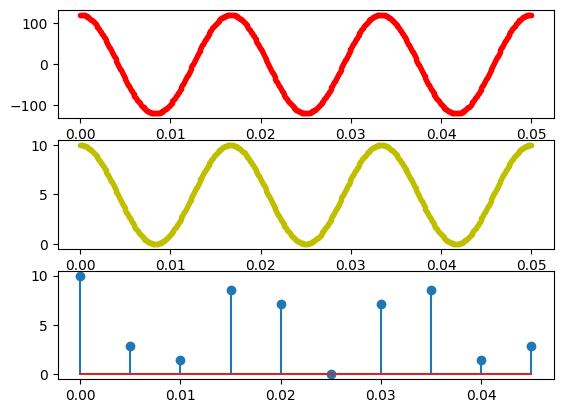

In [21]:
discretizar_cuantizar_graficar(120,60,200,3,10,0)